![image.jpeg](PlayStore.jpeg)

# **Data Cleaning and Analysis Activities**

**`Note:` it's better to make a copy from the dataframe and test on it before making any changes in the orignal one**

### 1.Which of the following column(s) has/have null values?

Select the columns that you have identified having null/missing values.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("googleplaystore.csv")

print(df.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [23]:

missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_cols.tolist())


Columns with missing values: ['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']


### 2. Clean the Rating Column and Other Columns Containing Null Values

**Steps:**

0. Try plotting a histogram and a boxplot for this column to understand the issue
1. Remove invalid values from the Rating column (set them as NaN).
2. Fill null values in the Rating column using the mean().
3. Clean any other non-numerical columns by dropping the rows containing null values.
4. Perform the modifications "in place", modifying `df`. If you make a mistake, re-load the data.

**Details:**
- Replace all ratings not in the range of 0 to 5 with NaN.
- Drop rows with null values in other columns.

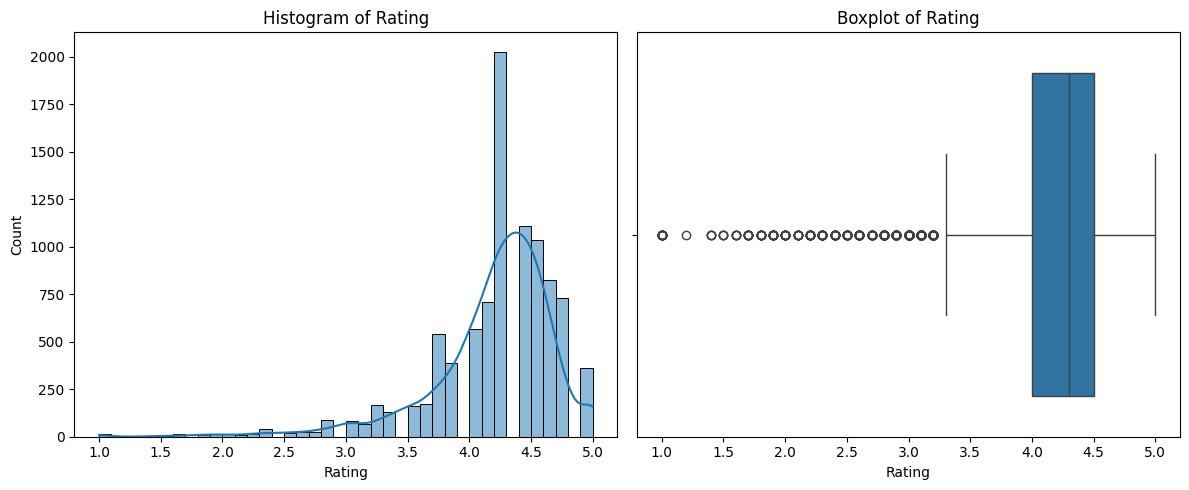

In [29]:
#Plot histogram and boxplot for Rating
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=40, kde=True)
plt.title("Histogram of Rating")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Rating")

plt.tight_layout()
plt.show()


In [33]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') #force non-numeric to NaN
df.loc[(df['Rating'] < 0) | (df['Rating'] > 5), 'Rating'] = pd.NA

#Fill missing Rating values with the mean
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

#Drop rows with nulls in non-numeric columns
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB
None


<ipython-input-33-8604b469f04d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(mean_rating, inplace=True)


### 3. Clean the Reviews Column and Make It Numeric

You'll notice that some columns from this dataframe which should be numeric, were parsed as object (string). That's because sometimes the numbers are expressed with M, or k to indicate Mega or kilo.

Clean the Reviews column by transforming the values to the correct numeric representation.

For example, 5M should be 5000000.

In [36]:
print(df.columns)
#Convert the Reviews column to numeric
def reviews(value):
    if isinstance(value, str): #check if yhe value is a string
        if 'M' in value:  # Convert "M" (Millions) to an integer
            return int(float(value.replace('M', '').replace(',', '')) * 1000000)
        elif 'K' in value: #convert "K" (Thousands) to an integer
            return int(float(value.replace('K', '').replace(',', '')) * 1000)
    try:
        return int(value)  # Keep numeric values unchanged
    except ValueError:
        return None


df['Reviews'] = df['Reviews'].apply(reviews)

print(df[['Reviews']].head())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
   Reviews
0      159
1      967
2    87510
3   215644
4      967


### 4. Count the Number of Duplicated Apps

Count the number of duplicated rows. That is, if the app Twitter appears 2 times, that counts as 2.

In [37]:
duplicate_apps = df[df.duplicated(subset=['App'], keep=False)]  # Get all duplicated rows
print("Total duplicated app entries:", duplicate_apps.shape[0])  # Print count of duplicated rows
duplicated_count = df['App'].value_counts()  # Count occurrences of each app
duplicated_apps = duplicated_count[duplicated_count > 1]  # Filter for apps that are duplicated
print("\nDuplicated Apps and their counts:")
print(duplicated_apps)

Total duplicated app entries: 1979

Duplicated Apps and their counts:
App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
Android Messages                                     2
Google Duo - High Quality Video Calls                2
WPS Office - Word, Docs, PDF, Note, Slide & Sheet    2
Flickr                                               2
Chrome Dev                                           2
Name: count, Length: 798, dtype: int64


### 5. Drop Duplicated Apps Keeping Only the Ones with the Greatest Number of Reviews

Now that the Reviews column is numeric, we can use it to clean duplicated apps. Drop duplicated apps, keeping just one copy of each, the one with the greatest number of reviews.

Hint: you'll need to sort the dataframe by App and Reviews, and that will change the order of your df.

In [12]:
df = df.sort_values(by=['App', 'Reviews'], ascending=[True, False])

df = df.drop_duplicates(subset=['App'], keep='first') # Drop duplicate apps while keeping the one with the highest number of reviews

print(df.head())

                                       App       Category    Rating  Reviews  \
8884  "i DT" Fútbol. Todos Somos Técnicos.         SPORTS  4.191757       27   
8532         +Download 4 Instagram Twitter         SOCIAL  4.500000    40467   
324             - Free Comics - Comic Apps         COMICS  3.500000      115   
4541                                    .R          TOOLS  4.500000      259   
4636                                /u/app  COMMUNICATION  4.700000      573   

      Size    Installs  Type Price Content Rating         Genres  \
8884  3.6M        500+  Free     0       Everyone         Sports   
8532   22M  1,000,000+  Free     0       Everyone         Social   
324   9.1M     10,000+  Free     0     Mature 17+         Comics   
4541  203k     10,000+  Free     0       Everyone          Tools   
4636   53M     10,000+  Free     0     Mature 17+  Communication   

            Last Updated Current Ver Android Ver  
8884     October 7, 2017        0.22  4.1 and up  
8532    

### 6. Format the Category Column

Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

Example, the category AUTO_AND_VEHICLES should be transformed to: Auto and vehicles. Also, if you find any other wrong value transform it into an Unknown category.

In [40]:
def clean_category(value):
    try:
        if isinstance(value, str):
            # Replace underscores with spaces, make lowercase, then capitalize
            formatted = value.replace('_', ' ').lower().capitalize()
            return formatted
        else:
            return "Unknown category"
    except:
        return "Unknown category"

df['Category'] = df['Category'].apply(clean_category)
print(df['Category'].head(10))


0    Art and design
1    Art and design
2    Art and design
3    Art and design
4    Art and design
5    Art and design
6    Art and design
7    Art and design
8    Art and design
9    Art and design
Name: Category, dtype: object


### 7. Clean and Convert the Installs Column to Numeric Type

Clean and transform Installs as a numeric type. Some values in Installs will have a + modifier. Just remove the string and honor the original number (for example +2,500 or 2,500+ should be transformed to the number 2500).

In [14]:
df['Installs'] = df['Installs'].str.replace(r'\+', '', regex=True)
df['Installs'] = df['Installs'].str.replace(',', '', regex=True)
df['Installs'] = df['Installs'].astype(int)

print(df[['Installs']].head(10))


       Installs
8884        500
8532    1000000
324       10000
4541      10000
4636      10000
5940        100
10252    100000
1393     500000
8483     100000
7738        100


### 8. Clean and Convert the Size Column to Numeric (Representing Bytes)

The Size column is of type object. Some values contain either a M or a k that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, 898k will become 919552 (898 * 1024).

Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

Some other rules are related to + modifiers, apply the same rules as the previous task.

In [50]:
def convert_size(value):
    if isinstance(value, str):
        if 'M' in value:
            return int(float(value.replace('M', '')) * 1024 * 1024)
        elif 'k' in value:
            return int(float(value.replace('k', '')) * 1024)
        elif value == 'Varies with device':
            return 0

    try:
        return int(value)
    except (ValueError, TypeError):
        return 0

df['Size'] = df['Size'].apply(convert_size)

print(df[['Size']].head(10))


       Size
0  19922944
1  14680064
2   9122611
3  26214400
4   2936012
5   5872025
6  19922944
7  30408704
8  34603008
9   3250585


### 9. Clean and Convert the Price Column to Numeric

Values of the Price column are strings representing price with special symbol '$'.

In [16]:
# Remove '$'
df['Price'] = df['Price'].str.replace('$', '')
print(df[['Price']].head(10))

      Price
8884      0
8532      0
324       0
4541      0
4636      0
5940      0
10252     0
1393      0
8483      0
7738   1.49


### 10. Paid or Free?

Now that you have cleaned the Price column, let's create another auxiliary Distribution column.

This column should contain Free/Paid values depending on the app's price.

In [48]:
def classify_app(price):
    if price == 0:
        return 'Free'
    else:
        return 'Paid'

df['Type'] = df['Price'].apply(classify_app)
print(df[['Price']].head(10))

  Price
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0


## Finally!!!
- Now all is left is to save the new dataframe we made into a new csv file called `filteredplaystore.csv`

In [18]:
df.to_csv('filteredplaystore.csv',index = False) # :)

In [49]:
df.to_csv('/content/filteredplaystore.csv', index=False)

import os
print("File exists:", os.path.exists('/content/filteredplaystore.csv'))

from google.colab import files
files.download('/content/filteredplaystore.csv')



File exists: True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>